# Regression with a Crab Age Dataset

<img src="https://i.pinimg.com/736x/25/af/c0/25afc0440c74d2b2e3f859e98e02ebed.jpg" width="350">

**In this project**, the goal is to predict the **Age** of crabs from their measured physical attributes.  
The dataset is from a **Kaggle Playground Series** competition, and the task is a **regression problem** where the target variable is **`Age`**.

---

## Features Description

- `id` : Unique identifier for each observation  
- `Sex` : C = Infant, M = Male, F = Female (categorical)  
- `Length` : Longest shell measurement (continuous)  
- `Diameter` : Shell diameter, perpendicular to length  
- `Height` : Height with meat in shell  
- `Weight` : Whole crab weight  
- `Shucked Weight` : Weight of meat  
- `Viscera Weight` : Gut weight (after bleeding)  
- `Shell Weight` : Weight after drying  
- `Age` : Target variable (years)

---

The dataset was taken from Kaggle:

**[Kaggle | Regression with a Crab Age Dataset](https://www.kaggle.com/competitions/playground-series-s3e16/overview)**


## Data Read 

In [2]:
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## EDA - Exploratory Data Analysis

In [4]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
train.tail()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8
74050,74050,I,0.9125,0.6750,0.2000,5.386405,2.055339,1.034757,1.700970,6


In [6]:
train.shape

(74051, 10)

In [7]:
test.shape

(49368, 9)

In [8]:
sample.shape

(49368, 2)

In [9]:
train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [11]:
train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

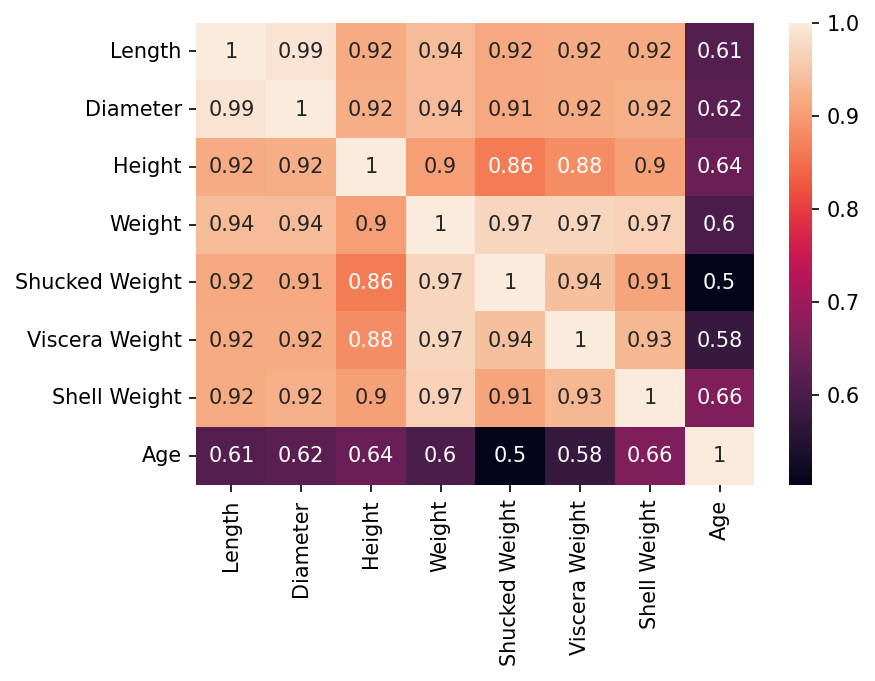

In [17]:
plt.figure(figsize=(6,4), dpi=150)
sns.heatmap(train.drop(columns=['id']).corr(numeric_only=True), annot=True)

<Axes: xlabel='Age', ylabel='Count'>

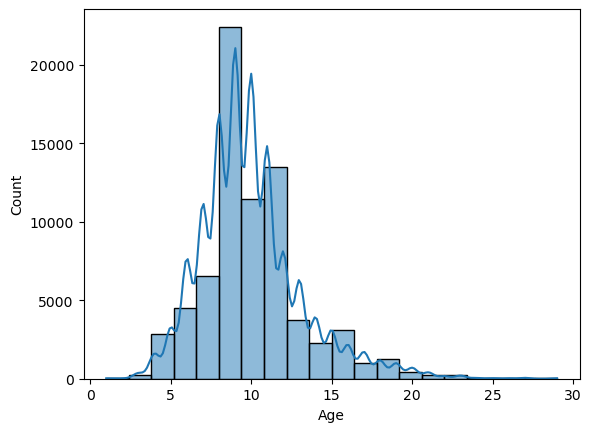

In [18]:
sns.histplot(train['Age'], bins=20, kde=True)

<Axes: xlabel='Shell Weight', ylabel='Count'>

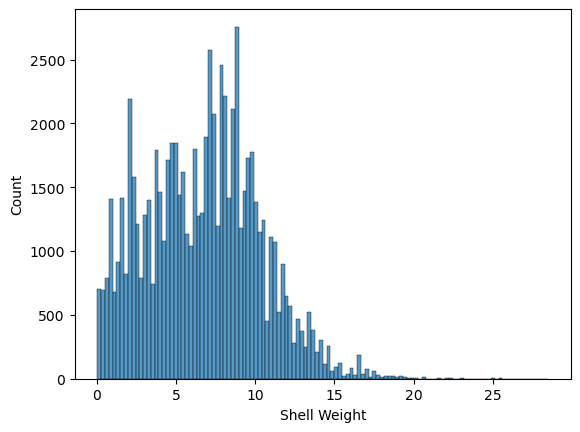

In [19]:
sns.histplot(train, x="Shell Weight")

<Axes: xlabel='Shucked Weight', ylabel='Count'>

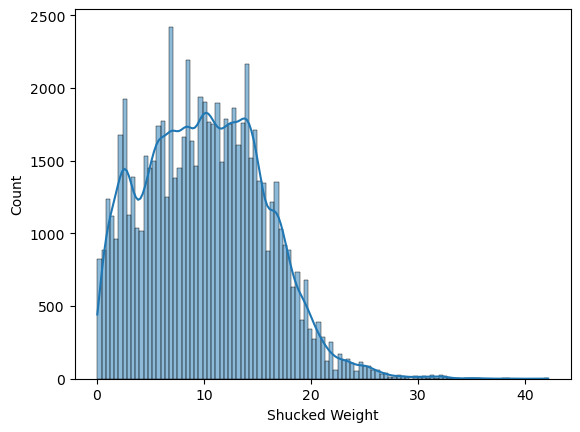

In [20]:
sns.histplot(train["Shucked Weight"], kde=True)

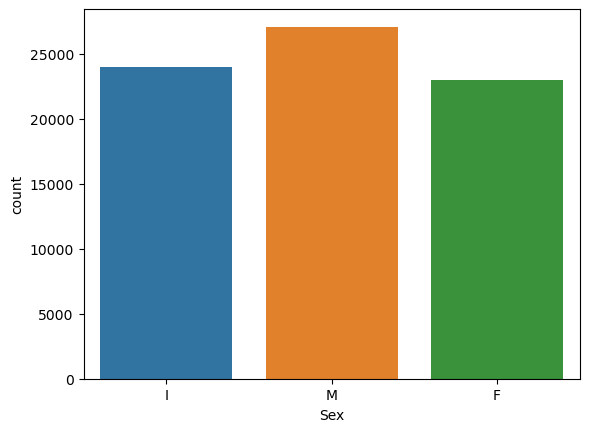

In [23]:
sns.countplot(x=train['Sex'],hue=train['Sex']);

In [24]:
abs(train.corr(numeric_only=True)['Age'].sort_values(ascending=False)) 

Age               1.000000
Shell Weight      0.663473
Height            0.638067
Diameter          0.621256
Length            0.612843
Weight            0.601195
Viscera Weight    0.576808
Shucked Weight    0.503320
id                0.000089
Name: Age, dtype: float64

## Modelling 

In [27]:
x = train.drop(columns=['id', 'Age']) 
y = train['Age']

In [28]:
x=pd.get_dummies(x,drop_first=True)

In [29]:
x.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,True,False


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def algo_test(x,y):

        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [31]:
algo_test(x, y)

,R_Squared,RMSE,MAE
mlp_regressor,0.584346,2.058195,1.432356
Gradient Boosting,0.582518,2.062715,1.429133
XGBRegressor,0.579741,2.069566,1.422762
SVR,0.558385,2.121497,1.405304
Linear,0.556981,2.124866,1.488617
Ridge,0.556801,2.125299,1.488312
SGD,0.544683,2.154157,1.505334
AdaBoost,0.511555,2.231147,1.542691
Decision Tree,0.149981,2.943301,1.978665
KNeighborsRegressor,0.131808,2.974598,2.523339


In [37]:
from sklearn.neural_network import MLPRegressor

In [38]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [39]:
mlp_regressor = MLPRegressor()

In [41]:
model = mlp_regressor.fit(x_train, y_train)

In [42]:
test = test.drop(['id'], axis=1)

In [46]:
test = pd.get_dummies(test,drop_first=True)

In [47]:
tahmin = mlp_regressor.predict(test)

In [48]:
tahmin

array([ 7.52797159,  7.77910838, 10.90906561, ..., 12.96366446,
       10.52025122, 12.29317868])

In [53]:
y_pred = mlp_regressor.predict(x_train)

In [55]:
mean_absolute_error(y_train,y_pred)

1.415299347301273

In [56]:
y_pred

array([ 9.56385819, 11.81044802, 10.17123189, ..., 10.51449057,
       15.47694868,  4.75078522])

## Submission

In [57]:
submission_id = sample['id']

In [58]:
submission = pd.DataFrame({'id': submission_id, 'Age' : tahmin})

In [59]:
submission.to_csv('submission.csv', index=False)
print('Submission Saved!')

Submission Saved!


## Conclusion

<img src="score.png" width="800">

In this project, several regression algorithms were tested, and **`MLPRegressor` was selected as the best-performing model**.  
On the validation set, it achieved approximately **R² = 0.58**, **RMSE ≈ 2.06**, and **MAE ≈ 1.43**.  
Using the trained model, predictions were generated for the Kaggle test set and submitted, yielding **Public MAE: 1.42254** and **Private MAE: 1.42164**.  
These results indicate that `MLPRegressor` provides stable performance for predicting **Age** from crabs’ physical attributes.
